In [1]:
import numpy as np
import matplotlib.pyplot as plt
from discrete_events_simulation import Scenario, simulate
np.random.seed(1234)

Start of generation
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Departure
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Departure
Departure
Departure
Arrival
Departure
Depart

Arrival
Arrival
Generation
Generation
Departure
Arrival
Generation
Arrival
Departure
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Departure
Arrival
Arrival
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Departure
Departure
Departure
Arrival
Generation
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Arrival
Departure
Generation
Generation
Departure
Arrival
Departure
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
End of generation
Start of generation
Generation
Generation
Generation
Arrival
Generation
Departure
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Arrival

Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Generation
Departure
Arrival
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure


# Statistical analysis
## Moving mean and variance

In [2]:
def moving_mean_var(new_data, old_mean, old_var, t):
    """ Calculates moving sample mean and variance at time t.
    
    Keywords:
        new_data (float): new data point arriving at time t.
        old_mean (float): previous sample mean.
        old_var (float): previous sample variance.
        t (int): time index
    
    Returns:
        new_mean (float): updated sample mean.
        new_var (float): updated sample variance.
    """
    
    new_mean = old_mean + (new_data - old_mean)/(t + 1)
    new_var = (1 - 1/t)*old_var + (t + 1)*(new_mean - old_mean)**2
    
    return new_mean, new_var

## Queue simulation

In [3]:
t = 0 # Counter for the simulation runs

q_max_mean = 0 # Initialise the average of the maximum queue length to 0
q_max_var = 0 # Initialise the variance of the maximum queue length to 0

# Initialise empty lists that will collect: maximum queue length during a run of the simulator, evolution of the average and variance of the maximum queue length during the performed runs
q_max_list, q_max_mean_list, q_max_var_list = ([] for i in range(3)) 

# Stopping criterion: achieve the target precision and perform at least 100 simulation runs
precision = 0.1
done = False

# Main loop
while not(done):
    # Run the simulator
    queues = simulate(Scenario())[1]
    max_queue_length = max(queues)
    
    # Store the values obtained during each simulation run to perform a statistical analysis 
    if t == 0:
        q_max_mean = max_queue_length # We only have one sample, don't need to update the variance!
    else:
        q_max_mean, q_max_var = moving_mean_var(max_queue_length, q_max_mean, q_max_var, t)
    
    q_max_list.append(max_queue_length)
    q_max_mean_list.append(q_max_mean)
    q_max_var_list.append(q_max_var)
    
    t += 1
    if np.sqrt(q_max_var/t) < precision and t >= 100:
        done = True # Exit the main loop

Start of generation
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Departure
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Departure
Departure
Departure
Arrival
Departure
Depart

Departure
Departure
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Departure
Arrival
Arrival
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Departure
Departure
Departure
Arrival
Generation
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Arrival
Departure
Generation
Generation
Departure
Arrival
Departure
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
End of generation
Start of generation
Generation
Generation
Generation
Arrival
Generation
Departure
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Generation
Generation
Arrival
Arrival
Arr

Arrival
Generation
Arrival
Generation
Departure
Departure
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Departure
Generation
Arrival
Departure
Generation
Departure
Departure
Arrival
Arrival
Departure
Generation
Departure
Generation
Arrival
Departure
Generation
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Departure
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Gen

Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Departure
Arrival
Departure
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Departure
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Depa

Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Departure
Generation
Arrival
Generation
Departure
Arrival
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Departure
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Arrival
Generation
Departure
Generation
Arrival
Generation
Ar

Generation
Arrival
Generation
Generation
Departure
Arrival
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Departure
Generation
Arrival
Departure
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Dep

Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Departure
Departure
Arrival
Generation
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Generation
Generation
Ar

Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Departure
Generation
Departure
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Arrival
Departure
Departure
End of generation
Departure
Departure
Start of generation
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Depart

Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Departure
Arrival
Generation
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Generation
Departure
Departure
Arrival
Arrival
Departure
Departure
Generation
Departure
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
End of generation
Departure
Departure
Departure
Departure
Departure
Start

Arrival
Generation
Departure
Departure
Generation
Generation
Generation
Generation
Arrival
Departure
Arrival
Arrival
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Departure
Generation
Generation
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Arrival
Generation
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Arrival
Generation
Departure
Departure
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arriva

Generation
Arrival
Generation
Generation
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Departure
Arrival
Generation
Arrival
Arrival
Generation
Generation
Generation
Arrival
Arrival
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Departure
Departure
Arrival
Departure
Generation
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Generation
Generation
Departure
Arrival
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Gener

Arrival
Generation
Arrival
Arrival
Generation
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Generation
Generation
Departure
Departure
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Departure
Generation
Arrival
Departure
Arrival
Departure
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Departure
Departure
Generation
Arrival
End of generation
Departure
Arrival
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Departure
Genera

Arrival
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Generation
End of generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Generation
Generation
Arrival
Arrival
Departure
Arrival
Arrival
Generation
Generation
Departure
Departure
Arrival
Arrival

Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Departure
Departure
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Departure
Departure
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Generation
Generation
Arrival
Arrival
Departure
Arrival
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Generation
Departure
Arrival
Generation
Arrival
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Generation
Departure
Departure
Arrival
Departure
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Departure
Departure
Depar

Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Departure
Departure
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Departure
Generation
Generation
Departure
Generation
Arrival
Arrival
Arrival
Generation
Genera

Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
End of generation
Departure
Departure
Arrival
Departure
Start of generation
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Departure
Departure
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Generation
Generation
Arrival
Arrival
Departure
Arrival
Generation
Departure
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generat

Generation
Departure
Arrival
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Departure
Arrival
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
End of generation
Arrival
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Departure
Generation
Arrival
Generation
Generation
Generation
Generation
Generation
Departure
Generation
Arrival
Arrival
Arrival
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Departure
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Departure
Generation
Generation
Generation
A

Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Departure
Departure
Generation
Arrival
Departure
Arrival
Generation
Departure
Arrival
Departure
Departure
End of generation
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Departure
Arrival
Departure
Generation
Arrival
Arrival
Generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Generation
Departure
Arr

Arrival
Generation
Departure
Departure
Departure
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Departure
Arrival
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Arrival
Generation
Departure
Generation
Generation
Arrival
Generation
Generation
Departure
Generation
Arrival
Arrival
Arrival
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival

Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Arrival
Arrival
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Departure
Departure

Departure
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Departure
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Departure
Departure
Arrival
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Gener

Generation
Arrival
Departure
Arrival
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Departure
Departure
Generation
Generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Generation
Generation
Departure
Arrival
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Departure
Generation
Arrival
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Ge

Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Departure
Arrival
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Departure
Departure
Generation
Arrival
Arrival
Departure
Generation
Departure
Generation
Arrival
Departure
Arrival
Departure


Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Departure
Generation
Departure
Arrival
Departure
Departure
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
End of generation
Departure
Departure
Start of generation
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Generation
Departure
Arrival
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Departure
Arrival
Generation
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Departure
Arrival
Generation
Arrival
Departure
Gene

Generation
Arrival
Arrival
Arrival
Departure
Departure
Generation
Departure
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
Arrival
Departure
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Departure
Arrival
Generation
Generation
Departure
Arrival
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Generation
Departure
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generati

End of generation
Arrival
Departure
Arrival
Departure
Departure
Start of generation
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Departure
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Ge

Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Departure
Departure
Generation
Arrival
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Generation
Arrival
Arrival
Departure
Arrival
Arrival
End of generation
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Arrival
Departu

Departure
Arrival
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Departure
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Generation
Departure
Departure
Arrival
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generat

Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Departure
Arrival
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Generation
Generation
Generation
Departure
Arrival
Arrival
Arrival
Departure
Generation
Generation
Arrival
Generation
Departure
Arrival
Arrival
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Gene

Generation
End of generation
Departure
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Generation
Departure
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
G

Departure
Departure
End of generation
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Departure
Arrival
Generation
Departure
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Generation
Departure
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Arrival
Generation
Generation
Arrival
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Generation
Generation
Departure
Departure
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Gene

Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Departure
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Departure
Departure
Arrival
Generation
Departure
Gene

Generation
Departure
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Generation
Departure
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Departure
Departure
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Generation
Departure
Arrival
Arrival
Arrival
Departure
Generation
Departure
Generation
Arrival
Departure
Arrival
Departure
Departure
End of generation
Departure
Start of generation
Generation
Arr

Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Arrival
Departure
Departure
Departure
Generation
Generation
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Departure
Generation
Generation
Arrival
Arrival
Arrival
Generation
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Generation
Arrival
Departure
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Departure
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departur

Departure
Generation
Departure
Arrival
Generation
Departure
Departure
Departure
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Departure
Generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Departure
Arrival
Generation
Departure
Generation
Departure
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Departure
Arrival
Generation
Arrival
Departure
Arrival
Departure

Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Arrival
Generation
Generation
Departure
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Generation
Departure
Arrival
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Arrival
Departure
Departure
Departure
Generation
Departure
Generation
Arrival
Generation
Departure
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation

Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Departure
Departure
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Generation
Arrival
Departure
Arrival
Generation
Arrival
Departure
Generation
Generation
Departure
Arrival
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Generation
Departure
Arrival
Generation
Departure
Arrival
Arrival
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Departure
Generation
Arrival
Generation
Arrival
Arrival
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
End of generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arriv

Departure
Start of generation
Generation
Generation
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Departure
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Generation
Departure
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Ge

Arrival
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Departure
Generation
Generation
Departure
Generation
Departure
Departure
Arrival
Departure
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Departure
Departure
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Generation
Generation
Generation
Arrival
Departure
Arrival
Arrival
Arrival
Generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Departure
Generation
Generation
Departure
Arrival
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Arrival
Generation
Departure
Departure
Departure
Arrival
Generation
Generation
Generation
Arrival


Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Departure
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
End of generation
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Departure
Arrival
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Arrival
Generation
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Generation
Generation
Departure
Arr

Departure
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Departure
Arrival
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Departure
Departure
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Departure
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
End 

Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Departure
Departure
Arrival
Generation
Arrival
Generation
Departure
Departure
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
End of generation
Departure
Departure
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Ge

Arrival
Arrival
Generation
Departure
Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Generation
Departure
Generation
Arrival
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Departure
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
Generation
Arrival
Generation
Arriv

Generation
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Departure
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Generation
Departure
Arrival
Arrival
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Departure
Generation
Departure
Generation
Arrival
Departure
Arrival
Arrival
Departure
Generation
Departure
Departure
Arrival
Generation
Arrival
Generation
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generati

Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Arrival
Generation
Departure
Generation
Arrival
Departure
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Generation
Departure
Generation
Arrival
Arrival
Generation
Generation
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Generation
Departure
Generation
Arrival
Generation
Departure
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
End of generation
Arrival
Departure
D

Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Generation
Arrival
A

Departure
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Generation
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
Arrival
Gene

Arrival
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Generation
Departure
Departure
Arrival
Generation
Arrival
Departure
Generation
Departure
Departure
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generat

Generation
Departure
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Generation
Arrival
Departure
Departure
Arrival
Generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Departure
Generation
Departure
Departure
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Departure
Generation
Generation
Arrival
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Generation
Departure
Departure
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Departure
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Ge

Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
Generation
Arrival
Departure
Departure
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Generation
Arrival
Arrival
End of generation
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Generation
Arrival
Arrival
Departure
Arrival
Generation
Departure
Arri

Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Generation
Departure
Arrival
Generation
Arrival
Arrival
Generation
Generation
Departure
Arrival
Arrival
Departure
Departure
D

Generation
Arrival
Arrival
Arrival
Generation
Departure
Arrival
Departure
Generation
Departure
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Departure
Departure
Departure
Arrival
Dep

Departure
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
End of generation
Arrival
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Generation
Departure
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Departure
Departure
Departure
Generation
Generation
Departure
Arrival
Departure
Departure
Arrival
Generation
Arrival
Generat

Generation
Departure
Arrival
Generation
Arrival
Generation
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Arrival
Departure
Departure
Departure
Generation
Generation
Departure
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
End of generation
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Generation
Departure
Generation
Generation
Departure
Generation
Arrival
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Arrival
Generation
Departure
Departure
Departure
Arrival
Departure
Generation
Arrival
Generation
Generation
Generation
Generation


Departure
Generation
Arrival
Arrival
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Departure
Departure
Departure
Arrival
Departure
Departure
Generation
Generation
Departure
Departure
Departure
Arrival
Arrival
Generation
Departure
Arrival
Generation
Departure
End of generation
Arrival
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Departure
Departure
Arrival
Generation
Generation
Departure
Arrival
Generation
Departure
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Departure
Departure
Generation
Generation
Arrival
Arrival
Arrival
Departure
Departure
Generation
Departure
Departure
Arrival
Gener

Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
End of generation
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Generation
Departure
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Departure
Departure
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Generation
Generation
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Arrival
Departure
Generation
Generation
Arrival
Departure
Departure
Arrival
Departure
Genera

Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Generation
Generation
Departure
Arrival
Departure
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Departure
Departure
Arrival
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
End of generation
Departure
Departure
Departure
Departure
Departure


Generation
Departure
Arrival
Departure
Generation
Departure
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Departure
Generation
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Arrival
Generation
Departure
Arrival
Generation
End of generation
Arrival
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Generation
Generation
Arrival
Arrival
Departure
Arrival
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Departure
Departure
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Gener

Generation
Departure
Departure
Arrival
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Departure
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Departure
Departure
Generation
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Generation
Generation
Generation
Departure
Arrival
Arrival
Arrival
Generation
Arrival
Arrival
Generation
Departure
Departure
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Departure
Departure
Arrival
Generat

Start of generation
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Generation
Arrival
Departure
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Departure
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
Gener

Departure
Generation
Arrival
Departure
Generation
Departure
Departure
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Departure
Arrival
Departure
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Generation
Departure
Arrival
Departure
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Departure
Departure
Arrival
Generation
Arrival
Generation
Departure
Generation
Generation
Arrival
Departure
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
A

Arrival
Departure
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Departure
Generation
Arrival
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Departure
Departure
Departure
Generation
Departure
Arrival
Arrival
Departure
Generation
Departure
Departure
Arrival
Departure
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Generation
Arrival
Generation
Arrival
Arrival

Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Departure
Departure
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Departure
Generation
Arrival
Departure
Arrival
Departure
Generation
A

Arrival
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Departure
Generation
Departure
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Departure
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
End of generation
Departure
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Departure
Arrival
Generat

Departure
Departure
Generation
Departure
Departure
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Departure
End of generation
Start of generation
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Departure
Generation
Generation
Arrival
Arrival
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Departure
Generation
Departure
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Generation
Generation
Arrival
Departure
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Depar

Arrival
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Departure
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Departure
Departure
Departure
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Generation
Generation
Generation
Departure
Departure
Arrival
Arrival
Generation
Arrival
Departure
Arrival
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Departure
Arrival
Generation
End of generation
Departure
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arr

Departure
Generation
Generation
Generation
Arrival
Departure
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Departure
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Departure
Arrival
Arrival
Generation
Arrival
Generation
Departure
Departure
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Departure
Generation
Arrival
Arrival
Generation
Departure
Generation
Arrival
Departure
Departure
Arrival
Generation
Arrival
Ge

Generation
Departure
Arrival
Generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Generation
Departure
Departure
Arrival
Generation
Departure
Departure
Arrival
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Generation
Arrival
Departure
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
A

Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Departure
Departure
Arrival
Generation
Arrival
Generation
Generation
Departure
Arrival
Generation
Arrival
Arrival
Departure
Generation
Generation
Departure
Generation
Arrival
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Departure
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Generation
Generation
Arrival
Departure
Generation
Arrival
Arrival
Arrival
Generation
Generation
Departure
Departure
Arrival
Generation
Departure
Arrival


Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Generation
Departure
Generation
Arrival
Arrival
Arrival
Departure
Departure
Generation
Arriva

Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Departure
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Generation
Arrival
Arrival
Departure
Arrival
Generation
Generation
Generation
Arri

Generation
Arrival
Departure
Arrival
Arrival
Generation
Generation
Arrival
Departure
Departure
Arrival
Generation
Arrival
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Departure
Arrival
Departure
Generation
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Generation
Departure
Departure
Arrival
Departure
Generation
Arrival
Generation
Generation
Generation
Ar

Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Generation
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Departure
Arrival
Generation
Departure
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Departure
Departure
Generation
Departure
Departure
Arrival
Generation
Generation
Arrival
Generation
Arrival
Generation
End of generation
Departure
Arrival
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Generation
Arrival
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Ar

Arrival
Generation
Arrival
Departure
Generation
Generation
Departure
Arrival
Arrival
Generation
Departure
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Departure
Arrival
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Departure
Departure
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Arrival
Generation
Departure
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
End of generation
Departure
Departure
Departure
Departure
Departure
Departu

Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Generation
Departure
Departure
Arrival
Departure
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Arrival
Departure
Generation
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Arrival
Generation
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Arrival
Departure
Generation
Departure
Departure
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Generation
Arrival
Arr

Generation
Departure
Generation
Departure
Arrival
Departure
Departure
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Departure
Arrival
Arrival
Departure
Departure
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Arrival
Generation
Generation
Arrival
Generation
Arrival
Generation
Generation
Generation
Departure
Departure
Arrival
Departure
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Departure
Generation
Arrival
Departure
Arrival
Generation
End of generation
Departure
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Gen

Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Generation
Departure
Arrival
Departure
Generation
Departure
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Departure
Generation
Arrival
Arrival
Arrival
D

Generation
Arrival
Arrival
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Departure
Arrival
Generation
Departure
Departure
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departu

Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Generation
Arrival
Departure
Arrival
Departure
Generation
Departure
Departure
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Departure
Arrival
De

Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Generation
Departure
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Departure
Generation
Arrival
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Arri

Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Generation
Departure
Generation
Arrival
Departure
Arrival
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Generation
Arrival
Arrival
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
End of generation
Departure
Departure

Generation
Arrival
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Arrival
Departure
Departure
Generation
Generation
Departure
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Departure
Generation
Departure
Arrival
Departure
Arrival
Generation
Departure
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Departure
Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Generation
Arrival
Arrival
Departure
Generation
Departure
Generation

Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Departure
Departure
Arrival
Departure
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Departure
Generation
Generation
Departure
Arrival
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival


Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Generation
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Generation
Departure
Arrival
Arrival
Departure
Arrival
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Arrival
Departure
Generation
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Generation
Arrival
Departure
Departure
Departure
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival

Generation
Generation
Arrival
Departure
Arrival
Generation
Departure
Generation
Generation
Arrival
Departure
Arrival
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Generation
Departure
Departure
Arrival
Departure
Arrival
Generation
Departure
Generation
Arrival
Departure
Generation
Arrival
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Departure
Generation
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Arrival
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Departure
Arrival
Generation
Generation
Generation
Departure

Departure
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Departure
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Departure
Arrival
Generation
Generation
Departure
Departure
Arrival
Departure
Departure
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Departure
Arriv

Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Departure
Generation
Generation
Departure
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Generation
Departure
Departure
Arrival
Generation
Arrival
Generation
Departure
Departure
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generat

Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Generation
Generation
Arrival
Generation
Departure
Arrival
Departure
Arrival
Generation
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Arrival
Generation
Departure
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Generation
Departure
Arrival
Departure
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arri

Departure
Departure
Departure
Start of generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Generation
Departure
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Departure
Departure
Departure
Generation
Departure
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Departure
Arrival
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Departure
Arr

Departure
Departure
Departure
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Departure
Arrival
Arrival
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Generation
Generation
Arrival


Generation
Departure
Arrival
Departure
Generation
Generation
Generation
Departure
Arrival
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Departure
Generation
Arrival
Departure
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Departure
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Depar

Departure
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Departure
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Generation
Departure
Departure
Departure
Generation
Arrival
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Generation
End of generation
Departure
Arrival
Departure
Arrival
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Generation
Arrival
Generation
Generation
Arrival
Arriv

Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Departure
Departure
Departure
Departure
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arriv

Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Departure
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Generation
Arrival
Arrival
Departure
Arrival
Generation
Departure
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Departure
De

Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Generation
Departure
Departure
Departure
Departure
Arrival
Arrival
Generation
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Departure
Arrival
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Arrival
Generation
Generation
Arr

Generation
Generation
Arrival
Arrival
Departure
Arrival
Generation
Departure
Arrival
Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Generation
Departure
Arrival
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Generation
Arriv

Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Departure
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Departure
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Arrival
Generation
Generation
Departure
Departure
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation

Departure
Departure
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Generation
Generation
Departure
Arrival
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Arrival
Generation
Arrival
Departure
Generation
Departure
Departure
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Generation
End of generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation


Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Departure
Arrival
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Ge

Generation
Arrival
Generation
Generation
Arrival
Departure
Departure
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Departure
Arrival
End of generation
Departure
Departure
Start of generation
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Generation
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Generation
Departure
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
Arrival
Departure
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Gen

Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Departure
Arrival
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Departure
Generation
Arrival
Generation
Departure
Arrival
Arrival
Departure
Generation
Arrival
Generation
Departure
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
End of generation
Departure
Arrival
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival

Departure
Departure
Departure
Departure
Departure
Generation
Generation
Generation
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Generation
Arrival
Departure
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Departure
Departure
Arrival
Departure
Generation
Arrival
Generation
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Arrival
Departure
Departure
End of generation
Departure
Departure
Star

Arrival
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Departure
Arrival
Generation
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Arrival
Departure
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generatio

Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Departure
Departure
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Departure
Generation
Generation
Departure
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Generation
Departure
Generation
Departure
Arrival
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departu

Generation
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Arrival
Departure
Departure
Arrival
Departure
Departure
Departure
Generation
Generation
Generation
Arrival
Departure
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
Generation
Arrival
Arrival
Departure
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Genera

Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Departure
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Departure
Arrival
Departure
Arrival
Generation
Generation
Departure
Arrival
Departure
Departure
Arrival
Departure
Generation
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Generation
End of generation
Departure
Arrival
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generat

Departure
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Arrival
Generation
Departure
Generation
Departure
Departure
Departure
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Departure
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Generation
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Departure
Generation
Arrival
Arrival
Arrival
Departure
Generation
Departure
Departure
Departure
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
End 

Departure
Departure
Departure
Departure
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Departure
Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
End of generation
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Departure
Generation
Departure
Arrival
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Generatio

Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Generation
Departure
Generation
Arrival
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Departure
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Generation
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Arrival
Arrival
Generation
Departure
Departure
Arrival
Generation
Generation
Departure
Generation
Departure
Arrival
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Generation
Departure
Arrival
Generation
Gen

Generation
Arrival
Arrival
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Generation
Departure
Departure
Departure
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Departure
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Departure
D

Generation
Generation
Arrival
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Departure
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Departure
Generation
Arrival
Departure
Arrival
Departure
Arrival
Generation
Generation
Departure
Arrival
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Generation
Departure
Arrival
Generation
Arrival
Generatio

Departure
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Departure
Arrival
Generation
Departure
Arrival
Generation
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Generation
Departure
Departure
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Departure
Arrival
Departure
Generation
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Departure
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Depar

Departure
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Departure
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Departure
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Departure
Generation
Arrival
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Departure
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departur

Departure
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
End of generation
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Depa

Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Departure
Generation
Arrival
Departure
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Departure
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Departure
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Generation
Arrival
Departure
Gener

Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Departure
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Departure
Departure
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Generat

Arrival
Generation
Arrival
Generation
Arrival
Arrival
Generation
Departure
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Arrival
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Generatio

Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Departure
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Depart

Arrival
Arrival
Arrival
Generation
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Departure
Departure
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Departure
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Generation
Departure
Arrival
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Departure
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Departure
Arrival


Departure
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generati

Start of generation
Generation
Generation
Generation
Arrival
Departure
Generation
Arrival
Arrival
Generation
Arrival
Departure
Arrival
Departure
Generation
Departure
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Arrival
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Generation
Generation
Arrival
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
D

Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Departure
Arrival
Generation
Departure
Generation
Departure
Arrival
Arrival
Departure
Departure
Generation
Generation
Generation
Arrival
Arrival
Departure
Departure
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Departure
Arrival
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Departure
Generation
Arrival
Arrival
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival


Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Departure
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Generation
Departure
Arrival
End of generation
Departure
Departure
Departure
Start of generation
Generation
Arr

Arrival
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Departure
Arrival
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Departure
Arrival
Arrival
Departure
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival

Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Generation
Departure
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Arriva

Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Gen

Departure
Arrival
Departure
Departure
End of generation
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Generation
Departure
Generation
Arrival
Departure
Arrival
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Departur

Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Departure
Departure
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Departure
Arrival
Departure
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Departure
Departure
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Departure
Generation
Arrival
Generation
Generation
Arri

Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Departure
Generation
Departure
Generation
Departure
Arrival
Generation
Arrival
Arrival
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Generation
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Arrival
Departure
Arrival
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Departure
Arrival
Generation
Departure
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Departu

Generation
Generation
Arrival
Departure
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Departure
Departure
Arrival
Departure
Departure
Generation
Departure
Arrival
Generation
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Generation
Departure
Departure
Departure
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Departure
Arrival
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Star

Departure
Generation
Departure
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Generation
Departure
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
End of generation
Arrival
Departure
Departure
Start of generation
Generation
Arrival
Generation
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
G

Departure
Departure
Departure
Generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival


Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Departure
Generation
Arrival
Departure
Departure
Arrival
Generation
Generation
Departure
Generation
Arrival
Arrival
Departure
Arrival
Departure
Departure
Departure
Generation
Arrival
End of generation
Departure
Start of generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Gener

Departure
Generation
Departure
Departure
Generation
Departure
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Generation
Generation
Departure
Departure
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Departure
Departure
Arrival
Generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Generation
Generation
Arrival
Arrival
Departure
Arrival
Departure
Generation
Arrival
Generation
Departure
Departure
Arrival
Generation
Departure
Arrival
Generation
Arriva

Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Departure
Departure
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Arri

Departure
Generation
Arrival
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Arrival
Generation
Departure
Departure
Departure
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Departure
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
End of generation
Departure
Start of generation
Generation
Generation
Arrival
Arrival
Generation
Departure
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Departure
Departure
Generation
Generation
Ge

Arrival
Departure
Generation
Departure
Departure
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Arrival
Departure
Generation
Departure
Generation
Generation
Arrival
Departure
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arr

Generation
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Departure
Departure
Arrival
Departure
Generation
Departure
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Departure
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Departure
Arrival
Departure
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
End of generation
Arrival
Departure
Start of generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Arrival
Generation
Departu

Arrival
Departure
Arrival
Generation
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Departure
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Departure
Arrival
Arrival
Generation
Generation
Arrival
Generation
Arrival
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Departure
Generation
Arrival
Arrival
Arrival
Departure
Generation
Arrival
End of generation
Departure
Departure
Departure
Depa

Departure
Departure
Generation
Departure
Generation
Arrival
Arrival
Generation
Departure
Generation
Arrival
End of generation
Arrival
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Departure
Generation
Arrival
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Departure
Departure
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arri

Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
End of generation
Departure
Arrival
Departure
Start of generation
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Gener

Arrival
Generation
Departure
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Generation
Arrival
Departure
Departure
Arrival
Generation
Arrival
Departure
Generation
Departure
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation


Departure
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Departure
Departure
Arrival
Generation
Departure
Departure
Arrival
Generation
Arrival
Generation
Generation
Generation
Departure
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Departure
End of generation
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Departure
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
Departure
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Gen

Departure
Generation
End of generation
Arrival
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Generation
Departure
Arrival
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Departure
Generation
Arrival
Generation
Generation
Departure
Arrival
Departure
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Departure
Generation
Departure
Generation
Arrival
Ar

Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Departure
Generation
Generation
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Departure
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Depart

Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Departure
Arrival
Generation
Arrival
Generation
Generation
Departure
Arrival
Departure
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Departure
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Gen

Arrival
Departure
Generation
Generation
Departure
Arrival
Arrival
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Generation
Generation
Departure
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Generation
Arrival
Generation
Departure
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Departure
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Departure
Departure
Departure
Generation
Arrival
Arrival
Generation
Departure
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Departure
Arrival
Generation
Arrival
Depar

Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Arrival
Generation
Generation
Departure
Arrival
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Departure
Arrival
Departure
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Generation
Departure
Arrival
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Departure
Arrival
Departure
Generation
Departure
Arrival
Generatio

Departure
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Departure
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Generation
Gene

Generation
Arrival
Arrival
Arrival
Arrival
Arrival
Departure
Generation
Departure
Departure
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Generation
Generation
Generation
Departure
Arrival
Generation
Arrival
Arrival
Arrival
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Generation
Generation
Departure
Generation
Departure
Arrival
Departure
Departure
Arrival
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arr

Departure
Generation
Generation
Departure
Arrival
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Departure
Arrival
Generation
Arrival
Departure
Generation
Departure
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Departure
Arrival
Generation
Departure
Arrival
Generation
Departure
Departure
Departure
Generation
Arrival
Arrival
Departure
Generation
Departure
Departure
Generation
Arrival
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Departure
Generation
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
A

Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Generation
Departure
Arrival
Departure
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Generation
Generation
Departure
Arrival
Departure
Generation
Departure
Arrival
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Generatio

Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Departure
Generation
Arrival
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Generation
Departure
Arrival
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Departure
Generation
Generation
Arrival
Departure
Generation
Arrival
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generat

Generation
Arrival
Departure
Departure
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Departure
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Dep

Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Generation
Departure
Departure
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Departure
Departure
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Departure
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Generati

Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
End of generation
Start of generation
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Generation
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Arrival
Departure
Generation
Departure
Departure
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Departure
Departure
Arrival
Departure
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Depa

Generation
Generation
Arrival
Departure
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Generation
Generation
Arrival
Departure
Departure
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Depar

Arrival
Departure
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Departure
Generation
Arrival
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Generation
Departure
Arrival
Arrival
Departure
Departure
Departure
Generation
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Arrival
Generation
Generation
Generation
Arrival
Arrival
Departure
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Departur

Departure
Departure
Departure
Start of generation
Generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Generation
Generation
Arrival
Arrival
Departure
Departure
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Departure
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Genera

Generation
Generation
Arrival
Arrival
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Generation
Departure
Generation
Arrival
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation


Generation
Departure
Generation
Arrival
Departure
Arrival
Generation
Generation
Departure
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Departure
Departure
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Generation
Arrival
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Arrival
Generation
Departure
Arrival
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Departure
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
End of generation
Departure
Departure
Departure
Departure
Departure
Depart

Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Departure
Departure
Arrival
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
End of generation
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Arrival
Generat

Generation
Arrival
Departure
Arrival
Generation
Generation
Departure
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Departure
Generation
Arrival
Arrival
Generation
Generation
Generation
Departure
Arrival
Arrival
Departure
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Generation
Departure
Departure
Arrival
Generation
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Departure
Generation
Arrival
Generation
Arrival
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Departure
Generation
Arrival
Arrival
Arrival
Generation
Departure
Generation
Arriva

Arrival
Generation
Arrival
Generation
Generation
Generation
Departure
End of generation
Arrival
Arrival
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Arrival
Generation
Arrival
Generation
Departure
Departure
Generation
Arrival
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Depar

Generation
Arrival
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Generation
Arrival
Departure
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Generation
Generation
Arrival
Departure
Arrival
Generation
Departure
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Departure
Departure
Arrival
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Departure
Departure
Departure
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generatio

Departure
Departure
Generation
Generation
Generation
Arrival
Departure
Arrival
Arrival
Departure
Departure
Generation
Departure
Generation
Arrival
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Departure
Generation
Arrival
Departure
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Departure
Arrival
Generation
Arrival
Generation
Departure
Departure
Arrival
Generation
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Arrival
Generation
Generation
Departure
Arrival
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Departure
Arrival
Departure
Generation
Departure
Departure
Arrival
Departure
Generation
Generation
Arrival
Departure
Generation
Arrival
Depa

Arrival
Departure
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Departure
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Departure
Departure
Arrival
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
End of generation
Departure
Departure

Generation
Departure
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Generation
Departure
Arrival
Arrival
Generation
Departure
Arrival
Departure
Generation
Departure
Departure
Generation
Arrival
Arrival
Generation
Arrival
Generation
Generation
Arrival
Departure
Departure
Arrival
Departure
Departure
Departure
Departure
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Ge

Generation
Generation
Departure
Arrival
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Departure
Departure
Arrival
Departure
Departure
Departure
Departure
Generation
Generation
Departure
Arrival
Generation
Arrival
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
D

Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Departure
Generation
Generation
Generation
Arrival
Departure
Arrival
Arrival
Arrival
End of generation
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Gene

Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Generation
Departure
Arrival
Arrival
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
End of generation
Start of generation
Generation
Generation
Generation
Arrival
Departure
Arrival
Arrival
Generation
Generation
Arrival
Departure
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Departure
Generation
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure

Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Departure
Arrival
Generation
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Arrival
Departure
Arrival
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Departure
Generation
Departure
Arrival
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Arrival
End of generation
Departure
Start of generation
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Generation
Departure
Arrival
Arrival
Generation
Arrival
Departure
Generation
Generation
Departure
Generation
Arrival
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Generation
Generation
Departure
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Arrival
Gener

Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Departure
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Departure
Departure
Departure
Generation
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Departure
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Gener

Arrival
Arrival
Generation
Departure
Departure
Generation
Departure
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Departure
Generation
Arrival
Arrival
Departure
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Departu

Departure
Generation
Departure
Arrival
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Departure
Generation
Departure
Generation
End of generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Arrival
Departure
Depar

Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Arrival
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
End of generation
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Generation
Departure
Arrival
Departure
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Gene

Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Arrival
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Departure
Departure
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Departure
Arrival
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Departure
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Generation
Departure
Departure
Departure
Departure
Arrival
Generation
Arr

Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Generation
Departure
Departure
Arrival
Generation
Departure
Arrival
Departure
Generation
Departure
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
End of generation
Arrival
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Departure
Gener

Arrival
Departure
Departure
Arrival
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Departure
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Generation
Departure
Arrival
Arrival
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
End of generation
Departure
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Generation
Ar

Arrival
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Departure
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Departure
Arrival
Generation
Arrival
Arrival
Generation
Generation
Departure
Arrival
Departure
Arrival
Departure
Generation
Departure
Departure
Departure
Arrival
Generation
Departure
Generation
Generation
Arrival
Generation
Departure
Arrival
Arrival
Generation
Arrival
Generation
Departure
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Generation
Departure
Generation
Departure
Arrival
Generation
Arrival
Arrival
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
End of generation
Departure
Departure
Depa

Generation
Arrival
Departure
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Departure
Generation
Generation
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Departure
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generatio

Departure
Generation
Departure
Arrival
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Generation
Departure
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Departure
Departure
Departure

Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Departure
Generation
Arrival
Generation
Departure
Arrival
Arrival
Departure
Generation
Arrival
Generation
Generation
Generation
Departure
Arrival
Arrival
Departure
Arrival
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Generation
Generation
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Generation
Departure
Departure
Arrival
Arrival
Arrival
Generation
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Arrival
Generation
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generati

Arrival
Generation
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Departure
Arrival
Arrival
Departure
Generation
Generation
Departure
Arrival
Generation
Departure
Arrival
Arrival
Departure
Generation
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Genera

Arrival
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Departure
Departure
Generation
Arrival
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Departure
Departure
Generation
Departure
Departure
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Arrival
Departure
Generation
Departure
Departure
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Departu

Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Generation
Departure
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Departure
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Generation
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Departure
Departure
Arrival
Departure
Departure
Generation
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generat

Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Departure
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Generation
Departure
Generation
Generation
Arrival
Departure
Arrival
Arrival
Departure
Arrival
Generation
Generation
Arrival
Departure
Departure
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Generation
Departure


Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Departure
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Departure
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Departure
Generation
Departure
Departure
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Generation
Departure
Arrival
Arrival
Departure
Generation
Departure
Departure
Departure
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Departure
Departure
Generation
Generation
Departure
Arrival
Departure
Arrival
Departure
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
End of generation
Arrival
Arrival
Departure
Departure
Start of generation
Gene

Generation
Departure
Arrival
Generation
Arrival
Generation
Generation
Generation
Departure
Arrival
Arrival
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Generation
Arrival
Arrival
Departure
Arrival
Departure
Departure
Departure
Generation
Departure
Departure
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Departure
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Generation
Arrival
Generation
Departure
Arrival
Arrival
Departure
Departure
Generation
End of generation
Departure
Arrival
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Dep

Departure
Departure
Generation
Generation
Generation
Arrival
Departure
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Departure
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Generation
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Gener

Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Generation
Generation
Arrival
Departure
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Departure
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generati

Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Arrival
Generation
Generation
Arrival
Generation
Departure
Arrival
Arrival
Generation
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Arrival
Generation
End of generation
Arrival
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Departure
Arrival
Departure
Arrival
Departure
Generation
Arrival
Departure
Genera

Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Arrival
Departure
Departure
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Departure
Generation
Generation
Arrival
Arrival
Arrival
Generation
Generation
Generation
Arrival
Departure
Departure
Arrival
Arrival
Departure
Departure
Generation
Departure
Generation
Generation
A

Generation
Arrival
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Generation
Departure
Arrival
Generation
Departure
Arrival
Arrival
Generation
Arrival
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Arrival
Departure
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival

Arrival
Arrival
Arrival
Generation
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Generation
Departure
Arrival
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Arrival
Generation
Departure
Generation
Departure
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Generation
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Generation
Departure
Departure
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure

Arrival
Generation
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Departure
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Departure
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Generation
Departure
Arrival
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Departure
Departure
Arrival
Generation
Generation
Generation
Arrival
Gene

Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Departure
Generation
Departure
Arrival
Departure
Arrival
Departure
Departure
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Departure
Arrival
Departure
Generation
Departure
Arrival
Arrival
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departur

Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Departure
Departure
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Departure
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Departure
Generation
Arrival
Departure
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Generation
Departure
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Generation
Departure
Arrival
Departure
Arrival
Generation
Depar

Generation
Arrival
Departure
Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
End of generation
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Departure
Departure
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Generat

Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Departure
Departure
Generation
Departure
Departure
Departure
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure


Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Generation
Departure
Departure
Arrival
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Departure
Departure
Arrival
Generation
Gener

Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Generation
Generation
Arrival
Generation
Departure
Arrival
Arrival
Generation
Arrival
Departure
Departure
Arrival
End of generation
Depart

Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Generation
Departure
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arr

Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Arrival
Generation
Departure
Arrival
Departure
Generation
Departure
Generation
Departure
Arrival
Departure
Arrival
Generation
Generation
Generation
Departure
Arrival
Departure
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Departure
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Generati

Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Arrival
Generation
Generation
Generation
Arrival
Generation
Arrival
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Departure
Generation
Departure
Arrival
Arrival
Departure
Generation
Departure
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
End of generation
Departure
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Dep

Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Departure
Generation
Departure
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Generation
Departure
Departure
Arrival
Generation
Generation
Departure
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Generation
Departure
Departu

Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Departure
Departure
Arrival
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Generation
Departure
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
End of generation
Departure
Arrival
Departure
Start of generation
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departu

Generation
Departure
Generation
Arrival
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Generation
Departure
Generation
Departure
Arrival
Arrival
Arrival
Generation
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Generation
Departure
Generation
Arrival
Departure
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Departure
Generation
Generation
Generation
Arrival
Arrival
Departure
Arr

Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Generation
Generation
Arrival
Departure
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure


Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Arrival
Generation
Generation
Departure
Arrival
Departure
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Arrival
Generation
Departure
Arrival
Generation
Departure
Departure
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Departure
Departure
Departure
Generation
Generation
Arrival
Arrival
Arrival
Departure
Arrival
Generation
Generation
Arrival
Generation
Departure
Arrival
Arrival
Generation
Generation
Arrival
Generation
Arrival
Departure
Departure
Arrival
Generation
Departure
Arrival
Generation
Arriva

Arrival
Generation
Arrival
Generation
Departure
Departure
Arrival
Generation
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Generation
Generation
Departure
Arrival
Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Departure
Departure
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Genera

Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Generation
Arrival
Arrival
Arrival
Departure
Generation
Arrival
Generation
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Departure
Arrival
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Departure
Departure
Departure
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Departure
Arrival
Generation
Generation
Departure
Arrival
Departure
Arrival
Generation
Arrival
Generation
Generation
Generation
Arrival
Departure

Departure
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
End of generation
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Departure
Generation
Departure
Arrival
Generation
Departure
Arrival
Generation
Departure
Departure
Generation
Arrival
Departure
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Departure
Generation
Arrival
Arrival
Departure
Generation
Departure
Generation
Arrival
Departure
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Generation
Arrival
Arrival
Generation
Departure
Departure
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Genera

Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Departure
Generation
Arrival
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Arrival
Generation
Departure
Generation
Dep

Arrival
Departure
Arrival
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Generation
Departure
Departure
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Generation
Generation
Arrival
Departure
End of generation
Arrival
Departure
Start of generation
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Departure
Arrival


Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Generation
Generation
Generation
Arrival
Arrival
Arrival
Generation
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
Departure
Arrival
Generation
Arrival
Arrival
Generation
Generation
Generation
Arrival
Departure
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
End of generation
Arrival
D

Departure
Generation
Arrival
Generation
Arrival
Arrival
Generation
Generation
Generation
Generation
Departure
Generation
Arrival
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Arrival
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Departure
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Generation
Departure
Departure
Arrival
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Departure
Departure
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Generation
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Departure
Generation
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start 

Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Departure
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Generation
Arrival
Departure
Arrival
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Departure
Departure
Arrival
Departure
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Generation
Departure
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Depar

Arrival
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Departure
Departure
Departure
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Departure
Departure
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Departure
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generat

Arrival
Generation
Arrival
Arrival
Generation
Generation
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Departure
Arrival
Generation
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Generation
Generation
Arrival
Departure
Arrival
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Generation
Departure
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
End of generation
Arrival
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Arriv

Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Generation
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Arrival
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Departure
Generation
Departure
Arrival
End of generation
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Departure
Generation
Arrival
Departure
Generation
Generation
Departure
Arrival
Arrival
Generation
Arrival
Departure
Arrival
Generation
Departure
Departure
Arrival
Generation
Generation
Generation
Arrival
Arrival
Departure
Arrival
Generation
Departure
Arrival
Departure
Departure
Departure
Gene

Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Arrival
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Departure
Generation
Arrival
End of generation
Departure
Start of generation
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Generation
Generation
Arrival
Departure
Arrival
Arrival
Departure
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Arrival
Generation
Departure
Generation
Departure
Departure
Arrival
Arrival
Gener

Departure
Departure
Departure
Departure
Departure
Start of generation
Generation
Generation
Arrival
Departure
Generation
Arrival
Arrival
Generation
Generation
Departure
Departure
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Generation
Arrival
Arrival
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Departure
Generation
Departure
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Generation
Generation
Arrival
Arrival
Departure
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Departure
Arrival
Generation
Arrival
Departure
Generation
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Generation
Generation
Arri

Arrival
Departure
Departure
Generation
Generation
Arrival
Generation
Departure
Arrival
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Generation
Arrival
Departure
Generation
Arrival
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Departure
Departure
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Generation
Departure
Arrival
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Generation
Arrival
Departure
Departure
Departure
Generation
Generation
Arrival
Departure
Arri

Plot the mean maximum queue length and standard deviation

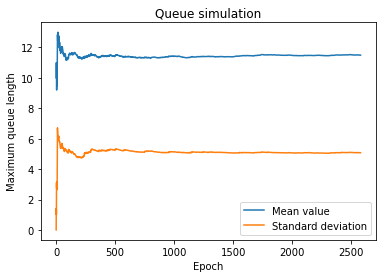

In [4]:
fig, ax = plt.subplots()

ax.plot(q_max_mean_list, label = 'Mean value')
ax.plot(np.sqrt(q_max_var_list), label = 'Standard deviation')

ax.set(xlabel = 'Epoch', ylabel = 'Maximum queue length', title = 'Queue simulation')
ax.legend()

plt.show()

## Bootstrapping

In [5]:
def bootstrap(data, f_statistic, draws):
    """ Calculates the bootstrap mse of a statistic of choice
    
    Keywords:
        data (array): data array.
        f_statistic: function handle calculating the statistic of interest.
        draws (int): number of bootstrap draws.
    
    Returns:
        mse (float): mean square error of the statistic of interest.
    """
    
    theta = f_statistic(data) # Compute the desired statistic over the empirical distribution
    mse = 0 # Initialise the mean square error to 0
    for i in range(draws):
        # Randomly choose samples from the dataset and recompute the statistic of interest
        indexes = np.floor(data.shape[0]*np.random.rand(data.shape[0]))
        samples = data[np.array(indexes).astype(int)]
        # Compute the total squared error
        mse += (theta - f_statistic(samples))**2
    # Take the mean diving by the number of iterations    
    mse = mse/draws
         
    return mse

In [6]:
# Define some function handles calculating statistics of interest
f_mean = lambda data: data.mean()
f_percentile = lambda data: np.quantile(data, 0.95)
f_max = lambda data: max(data)

In [7]:
q_max_list = np.array(q_max_list) # For convenience

# Mean of the maximum queue length
empirical_mean = f_mean(q_max_list) # Equals to q_max_mean up to numerical imprecisions
print(f'Mean: {empirical_mean}')
bootstrap_mse_mean = bootstrap(q_max_list, f_mean, 500)
print(f'Bootstrapped MSE: {bootstrap_mse_mean}')
mse_mean = q_max_list.var()/q_max_list.shape[0]
print(f'Theoretical MSE:  {mse_mean}\n')

# 95% percentile of the maximum queue length
empirical_95p = f_percentile(q_max_list)
print(f'95% percentile: {empirical_95p}')
bootstrap_mse_95p = bootstrap(q_max_list, f_percentile, 500)
print(f'Bootstrapped MSE: {bootstrap_mse_95p}\n')

# Worst case of the maximum queue length
empirical_ws = f_max(q_max_list)
print(f'Worst case: {empirical_ws}')
bootstrap_mse_ws = bootstrap(q_max_list, f_max, 500)
print(f'Bootstrapped MSE: {bootstrap_mse_ws}')

Mean: 11.492826677006592
Bootstrapped MSE: 0.008503166251230413
Theoretical MSE:  0.009991010293195603

95% percentile: 21.0
Bootstrapped MSE: 0.11786000000000171

Worst case: 35
Bootstrapped MSE: 1.1


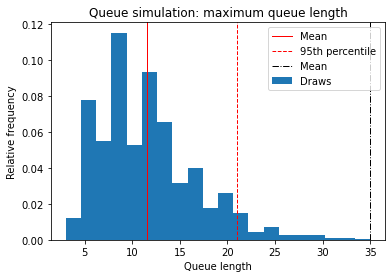

In [8]:
fig, ax = plt.subplots()

ax.hist(q_max_list, density = 1, bins = 20, label = 'Draws')

plt.axvline(empirical_mean, color = 'r', linestyle = 'solid', linewidth = 1, label = 'Mean')
plt.axvline(empirical_95p, color = 'r', linestyle = 'dashed', linewidth = 1, label = '95th percentile')
plt.axvline(empirical_ws, color = 'k', linestyle = 'dashdot', linewidth = 1, label = 'Mean')

ax.set(xlabel = 'Queue length', ylabel = 'Relative frequency', title = 'Queue simulation: maximum queue length')
ax.legend()

plt.show()